# ТМВ ДЗ-3
### Машины Тьюринга и квантовые вычисления
Чуворкин Михаил А-13а-19

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.circuit import Qubit
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

### Задание 1
Дано $N$ кубитов ($1 \le N \le 8$) в нулевом состоянии $|0\dots0\rangle$. Также дана некоторая последовательность битов, которое задаёт ненулевое базисное состояние (состояние в которое переходит кубит после измерения) размера $N$. Задача получить суперпозицию нулевого состояния и заданного.

$$|S\rangle = \frac{1}{\sqrt2}(|0\dots0\rangle + |\psi\rangle)$$

То есть требуется реализовать операцию, которая принимает на вход:


1. Массив кубитов $q_s$
2. Массив битов $bits$ описывающих некоторое состояние $|\psi\rangle$. Это массив имеет тот же самый размер, что и $qs$. Первый элемент этого массива равен $1$.


In [2]:
N = int(input('N = '))

bits = [] 

for i in range (N):
    bits.append(bool(int(input())))

print(bits)

N = 3
1
0
1
[True, False, True]


In [3]:
qr = QuantumRegister(N)
circuit = QuantumCircuit(qr)
#circuit.initialize("0"*N, circuit.qubits)

In [4]:
circuit.h(0)
circuit.barrier()
for i in range(1, len(bits)):
    if bits[i]: circuit.cx(qr[0], qr[i])

circuit.draw(initial_state=True)

┌───┐ ░      
q0_0: |0>┤ H ├─░───■──
         └───┘ ░   │  
q0_1: |0>──────░───┼──
               ░ ┌─┴─┐
q0_2: |0>──────░─┤ X ├
               ░ └───┘

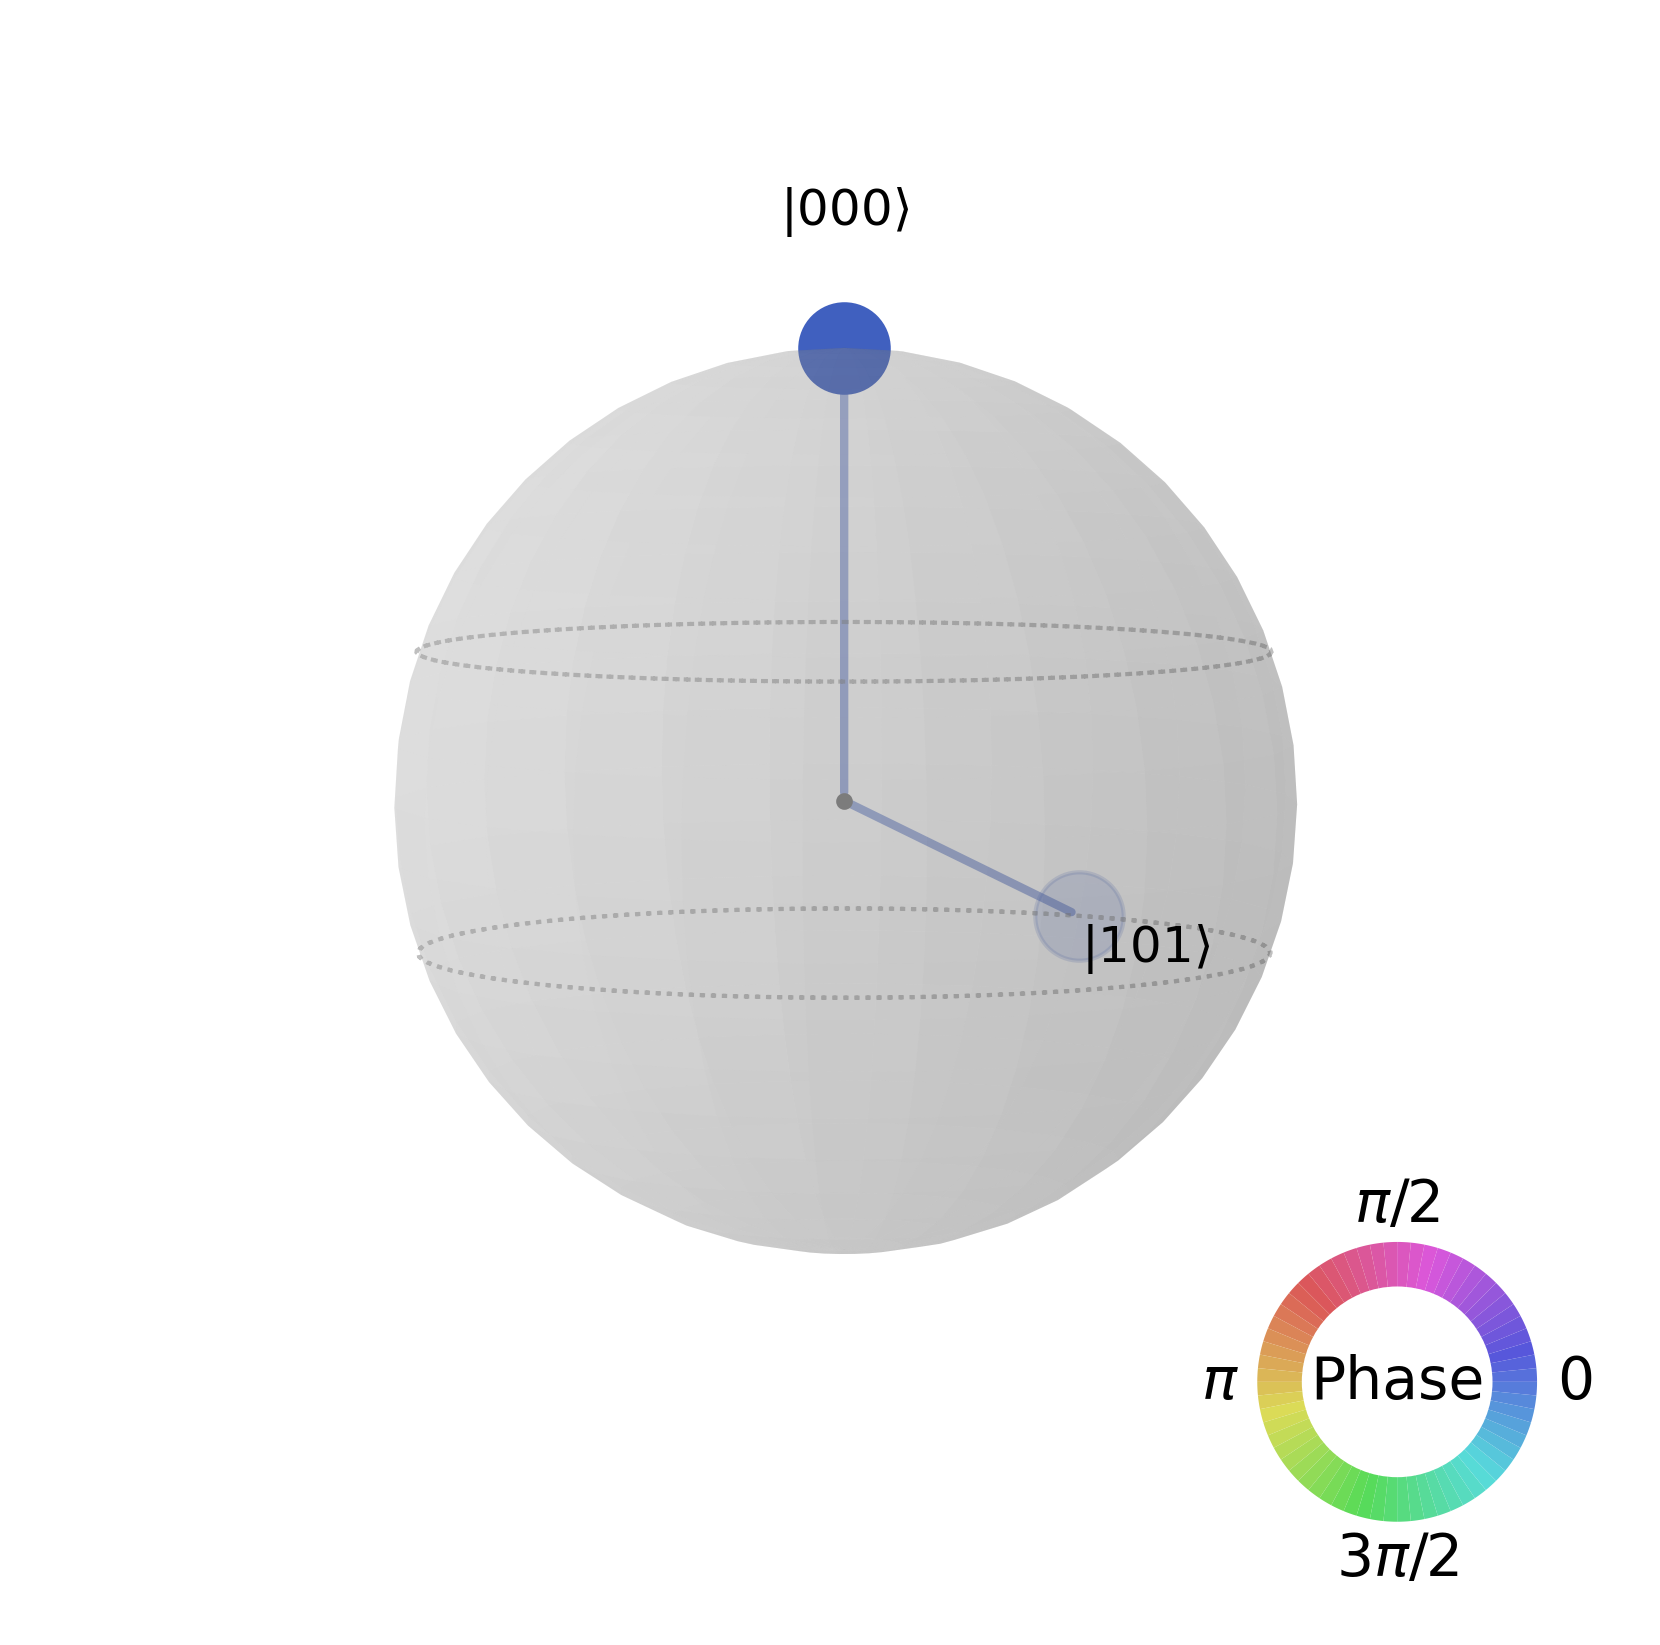

In [5]:
res = Statevector(circuit)
res.draw('qsphere')

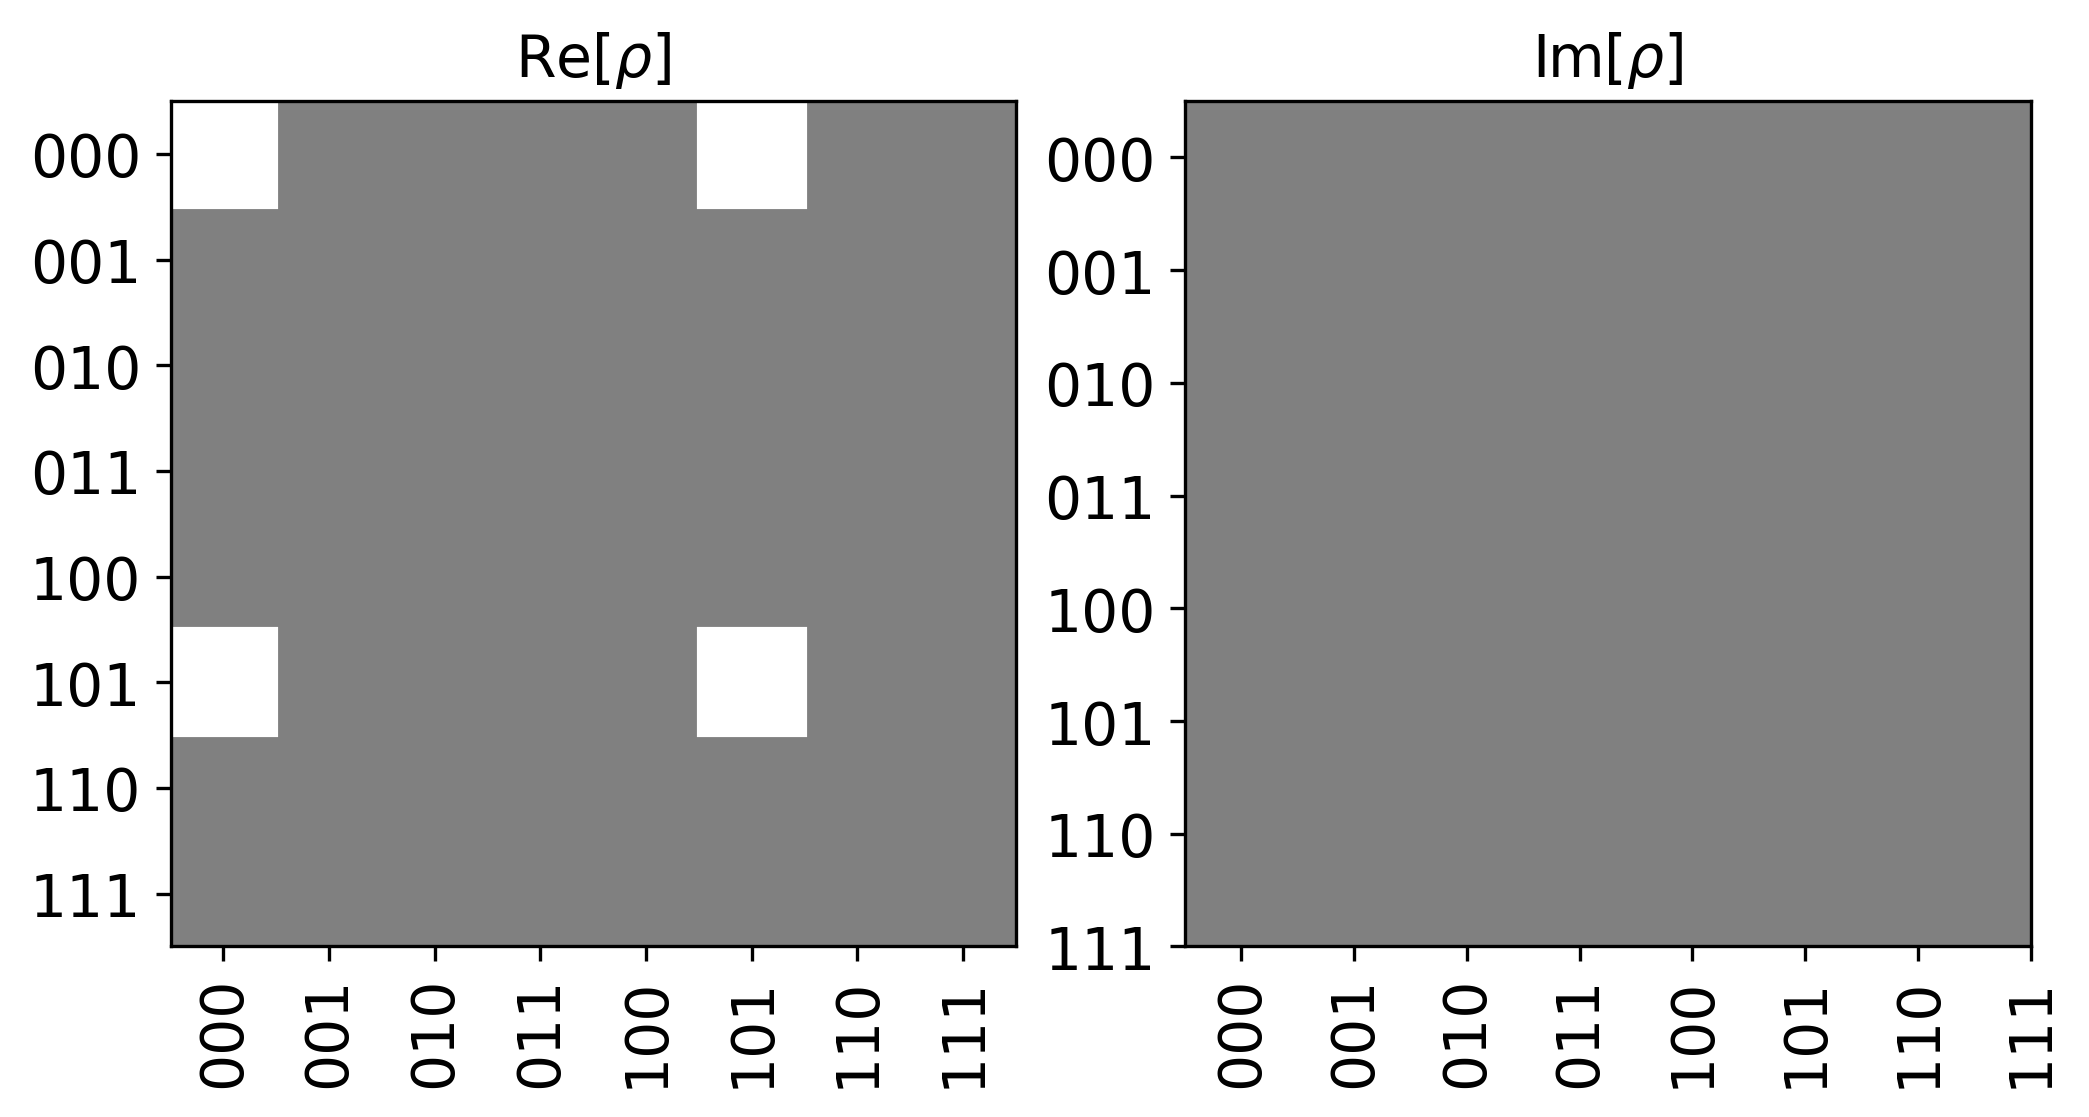

In [6]:
res = Statevector(circuit)
res.draw('hinton')
#print(res)

## Различение состояний 1

Дано $N$ кубитов ($1 \le N \le 8$), которые могут быть в одном из двух состояний:

$$|GHZ\rangle = \frac{1}{\sqrt2}(|0\dots0\rangle + |1\dots1\rangle)$$
$$|W\rangle = \frac{1}{\sqrt N}(|10\dots00\rangle+|01\dots00\rangle + \dots +|00\dots01\rangle)$$

Требуется выполнить необходимые преобразования, чтобы точно различить эти два состояния. Возвращать $0$, если первое состояние и 1, если второе. 

Создадим состояния.
$N$ кубитов $\Rightarrow$ $2^N$ состояний. Для нулевого и $2^N - 1$ состояния зададим значения корня из вероятности.

N = 3
Qubits: 3


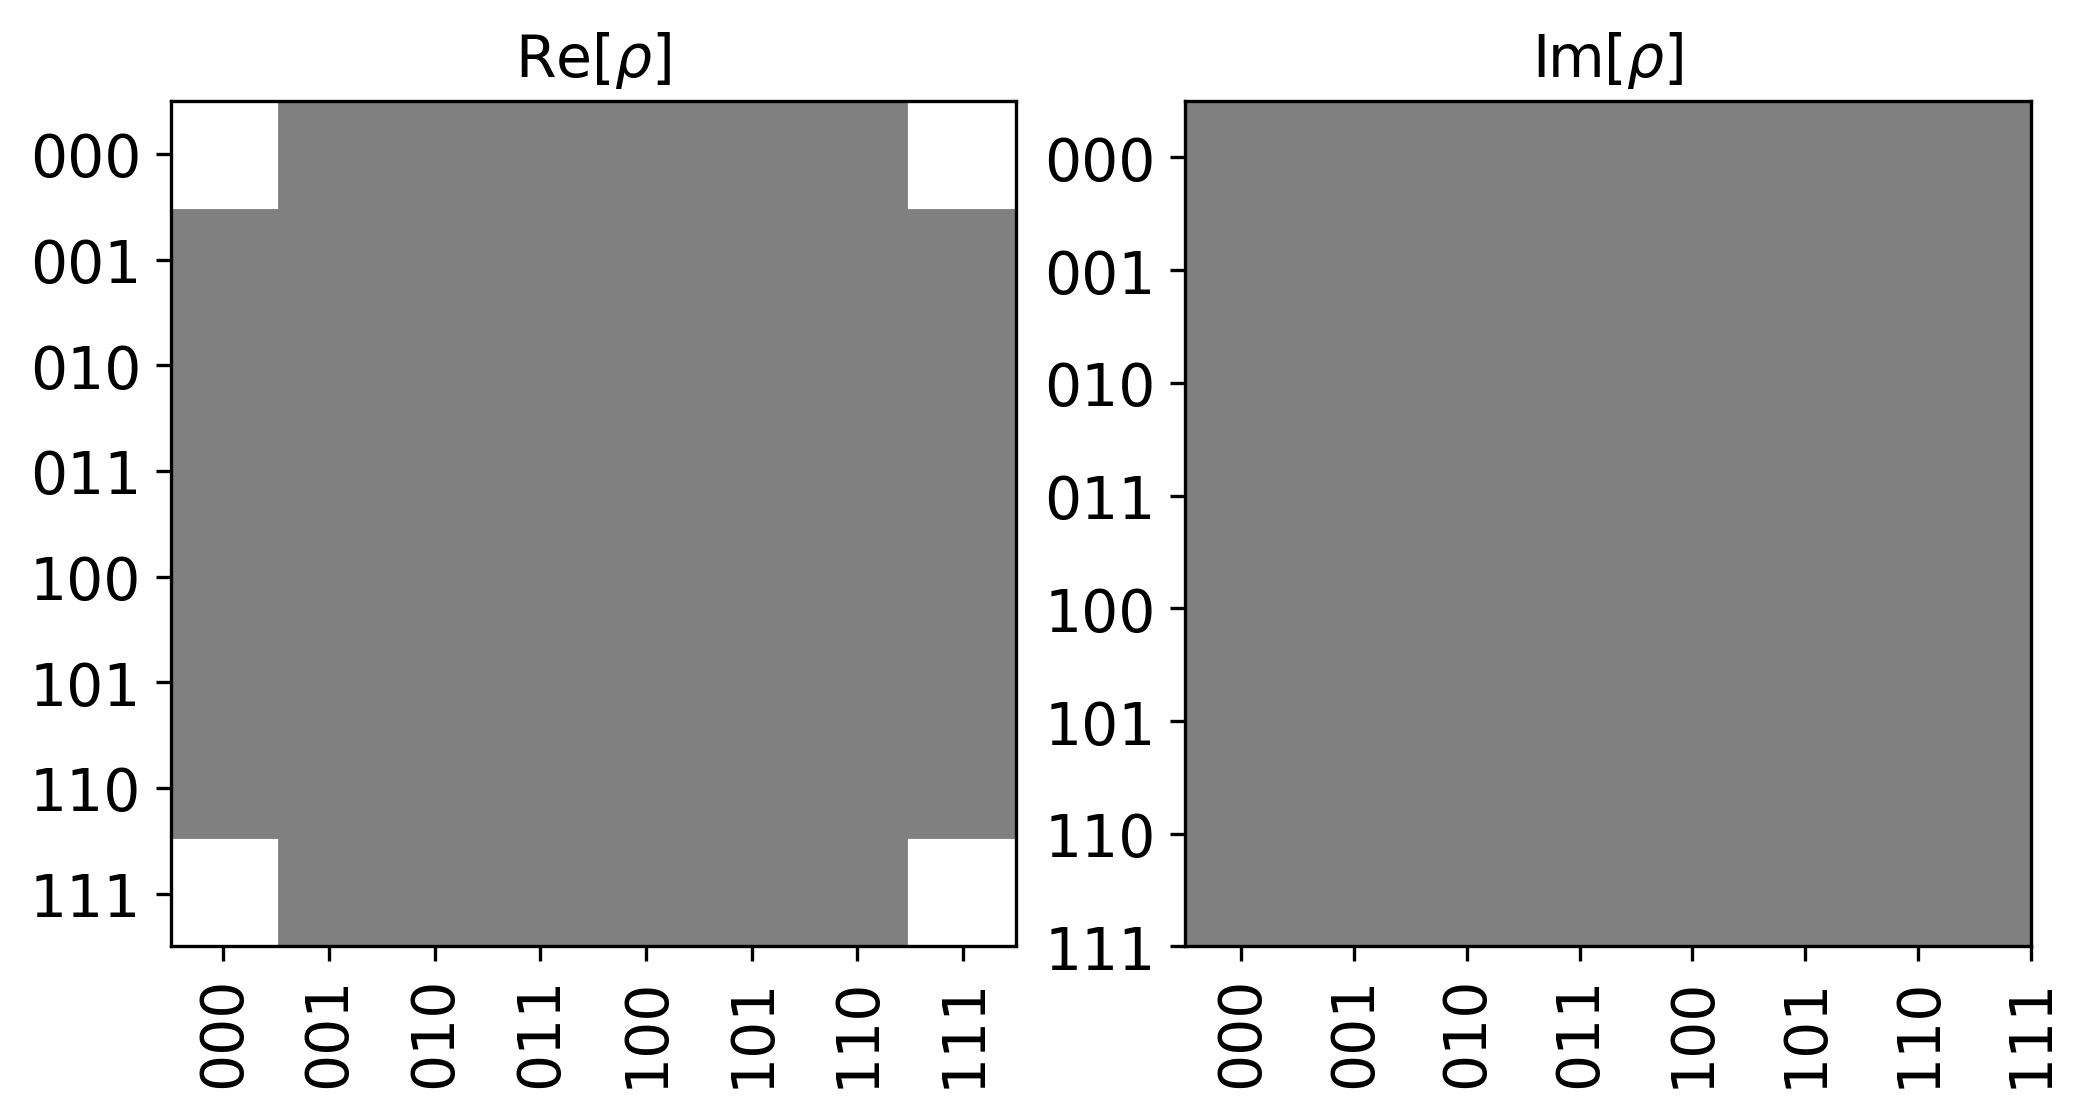

In [7]:
N = int(input('N = '))

# we need to set zeroth and 2**N-1 -th state to 1/sqrt(2)
ghz = [1/math.sqrt(2)]
for i in range (1, 2**N-1):
    ghz.append(0)
ghz.append(1/math.sqrt(2))

ghz = Statevector(ghz)
print(f'Qubits: {ghz.num_qubits}')
ghz.draw('hinton')

Теперь состояние $|W\rangle$: в нем на местах, равных степени двойки стоят единицы c вероятностями $\frac{1}{N}$, задаем их через корень из вероятностей.

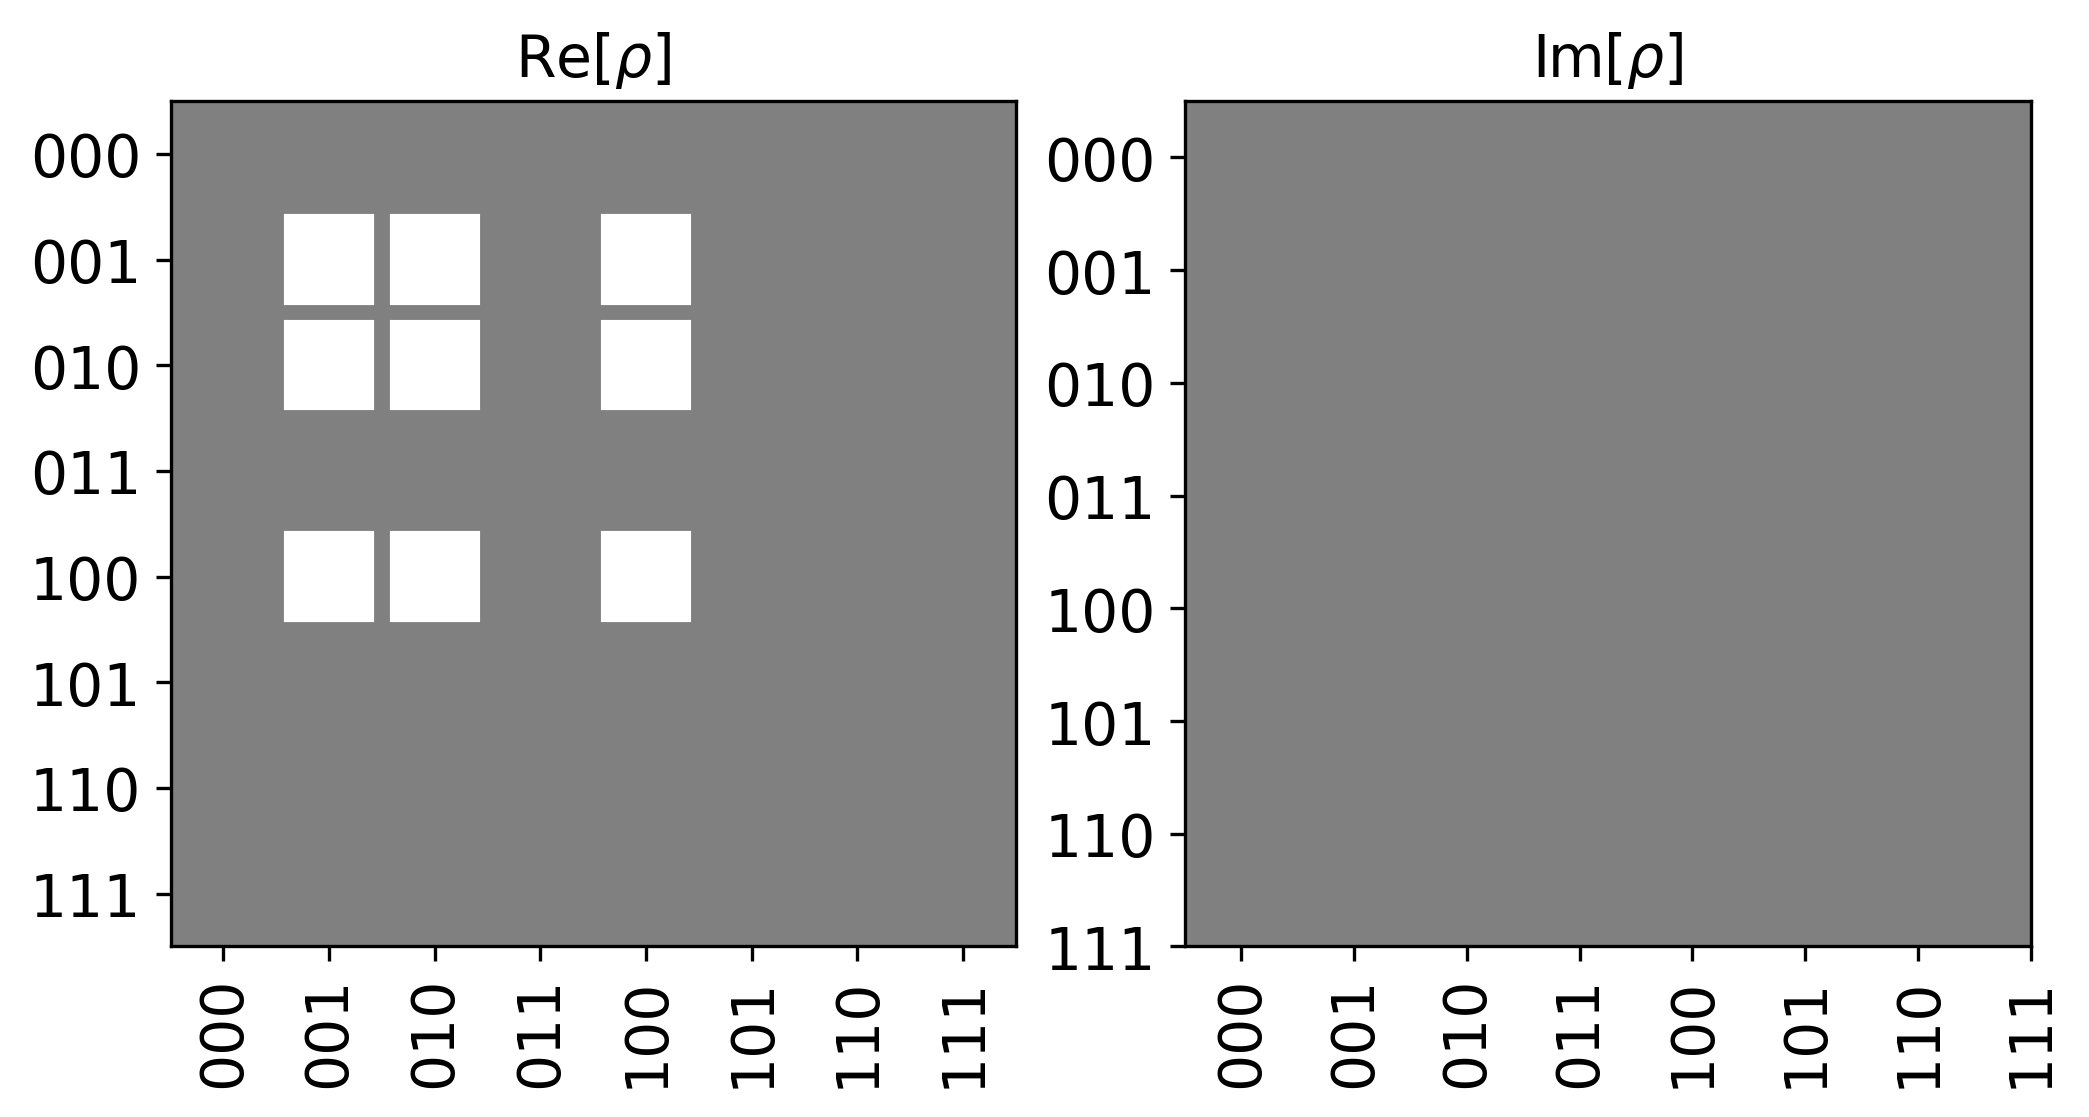

In [8]:
w = [0]
for i in range (1, 2**N):
    # https://stackoverflow.com/questions/57025836/how-to-check-if-a-given-number-is-a-power-of-two
    if i & i-1: w.append(0)
    else: w.append(1/math.sqrt(N))
w = Statevector(w)
w.draw('hinton')

Для различения состояний достаточно измерить кубиты. Тогда, если было состояний $GHZ$, все кубиты будут в состоянии $0$ или $1$. Если же было состояние $W$, то только один кубит был в состоянии $1$

В случае, когда $N = 1$, состояние не различить, так как в обоих случая может быть состояние $|1\rangle$

In [9]:
def get_last_state(state):
    res = state.measure()[0] # (outcome : str, state : post-measurement state) 
    c = res.count('1')
    return 1 if c == 1 else 0

In [10]:
st = w

res = ''
if get_last_state(st) == 1: res = "W"
else: res = 'GHZ'

print(f'State detected: {res}')

State detected: W


## Различение состояний 2
Дано $2$ кубита, которые могут быть в одном из четырех состояний:

$$|S_0\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$$
$$|S_1\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$$
$$|S_2\rangle = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)$$
$$|S_3\rangle = \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle)$$


Требуется выполнить необходимые преобразования, чтобы точно различить эти четыре состояния. Возвращать требуется индекс состояния (от $0$ до $3$). 

In [11]:
k = 1 / 2
S_0 = Statevector([k,  k,  k,  k])
S_1 = Statevector([k, -k,  k, -k])
S_2 = Statevector([k,  k, -k, -k])
S_3 = Statevector([k, -k, -k,  k])

In [12]:
#k = 1 / 2
#S_0 = Statevector([ k,  k,  k,  k])
#S_1 = Statevector([-k,  k, -k,  k])
#S_2 = Statevector([-k, -k,  k,  k])
#S_3 = Statevector([ k, -k, -k,  k])

In [13]:
S_0.draw('text')

[0.5+0.j,0.5+0.j,0.5+0.j,0.5+0.j]

In [14]:
S_1.draw('text')

[ 0.5+0.j,-0.5+0.j, 0.5+0.j,-0.5+0.j]

In [15]:
S_2.draw('text')

[ 0.5+0.j, 0.5+0.j,-0.5+0.j,-0.5+0.j]

In [16]:
S_3.draw('text')

[ 0.5+0.j,-0.5+0.j,-0.5+0.j, 0.5+0.j]

**Нулевое состояние**: для получения применяем оператор Адамара к двум кубитам

In [17]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

circuit.draw(initial_state=True)

┌───┐
q_0: |0>┤ H ├
        ├───┤
q_1: |0>┤ H ├
        └───┘
 c: 0 2/═════

Сверяемся с условием:

In [18]:
res = Statevector(circuit)
print(res == S_0)
print(res)
print(S_0)

True
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


Так как оператор унитарный, то после применения еще раз получим начальное состояние

In [19]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
res = Statevector(circuit)
print(res)

Statevector([1.00000000e+00+0.j, 3.25176795e-17+0.j, 6.22328532e-19+0.j,
             5.97792087e-34+0.j],
            dims=(2, 2))


Получили вектор $ 
\begin{pmatrix}
    1 \\
    0 \\
    0 \\
    0
\end{pmatrix}
$ Соответствующий $|00\rangle$

**Первое состояние:** получается заменой воторго кубита на $-|1\rangle$, если он был $|1\rangle$. Для этого применим ко второму кубиту оператор $Z$. 

In [20]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.z(qreg_q[0])

circuit.draw(initial_state=True)

┌───┐┌───┐
q_0: |0>┤ H ├┤ Z ├
        ├───┤└───┘
q_1: |0>┤ H ├─────
        └───┘     
 c: 0 2/══════════

In [21]:
res = Statevector(circuit)
print(res == S_1)
print(res)
print(S_1)

True
Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))
Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


In [22]:
circuit.h(qreg_q[0]) # gives 50-50 10 and 11
circuit.h(qreg_q[1]) # get exact value for qubit1: 10
res = Statevector(circuit)
print(res)

Statevector([3.25176795e-17+0.j, 1.00000000e+00+0.j, 5.97792087e-34+0.j,
             6.22328532e-19+0.j],
            dims=(2, 2))


Получили вектор $ 
\begin{pmatrix}
    0 \\
    1 \\
    0 \\
    0
\end{pmatrix}
$ Соответствующий $|01\rangle$

**Второе состояние:** если первый кубит равен $|1\rangle$, то он заменяется на $-|1\rangle$, что соответствует применению оператора $Z$ ко второму кубиту

In [23]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.z(qreg_q[1])

circuit.draw(initial_state=True)

┌───┐     
q_0: |0>┤ H ├─────
        ├───┤┌───┐
q_1: |0>┤ H ├┤ Z ├
        └───┘└───┘
 c: 0 2/══════════

In [24]:
res = Statevector(circuit)
print(res == S_2)
print(res)
print(S_2)

True
Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))
Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


In [25]:
circuit.h(qreg_q[1]) # gives 50-50 01 and 11
circuit.h(qreg_q[0]) # get exact value for qubit0: 01
res = Statevector(circuit)
res.draw('text')
#print(res)

[3.25176795e-17+0.j,5.97792087e-34+0.j,1.00000000e+00+0.j,
 6.22328532e-19+0.j]

Получили вектор $ 
\begin{pmatrix}
    0 \\
    0 \\
    1 \\
    0
\end{pmatrix}
$ Соответствующий $|10\rangle$

**Третье состояние**

In [26]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.z(qreg_q[0])
circuit.z(qreg_q[1])

circuit.draw(initial_state=True)

┌───┐┌───┐
q_0: |0>┤ H ├┤ Z ├
        ├───┤├───┤
q_1: |0>┤ H ├┤ Z ├
        └───┘└───┘
 c: 0 2/══════════

In [27]:
res = Statevector(circuit)
print(res == S_3)
print(res)
print(S_3)

True
Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))
Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


In [28]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
res = Statevector(circuit)
print(res)

Statevector([5.97792087e-34+0.j, 6.22328532e-19+0.j, 3.25176795e-17+0.j,
             1.00000000e+00+0.j],
            dims=(2, 2))


Получили вектор $ 
\begin{pmatrix}
    0 \\
    0 \\
    0 \\
    1
\end{pmatrix}
$ Соответствующий $|11\rangle$

In [29]:
def get_state(state):
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.initialize(state)
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    
    cur = Statevector(circuit)
    res = cur.measure()[0] # (outcome : str, state : post-measurement state) 
    
    num = int(res, 2)
    return num

In [30]:
get_state(S_0)

0